<a href="https://colab.research.google.com/github/aleksejalex/temp_rndmtx/blob/main/TNM_lec1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import scipy as scp
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import statsmodels as sm

In [16]:
from reliability.Fitters import Fit_Everything

In [2]:
# !pip install github

## definice a test fci

In [3]:
def generate_H(N: int = 8, seed: int = 13):
    #np.random.seed(seed=seed)
    H = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            if i!=j:
                mu = 0
                sigma = 1
                H[i,j] = mu + sigma * np.random.randn()
            else:
                mu = 0
                sigma = 2
                H[i,i] = mu + sigma * np.random.randn()
    return H

In [4]:
H = generate_H(3)
print(H)

[[ 2.87295018  1.18103432 -0.21320614]
 [ 0.44481946  1.75847344  0.90832347]
 [-0.03395813  1.34997377  0.48784013]]


In [5]:
def symmetrize(H):
    return (H+H.T) *(1/np.sqrt(2))

In [6]:
H_sym = symmetrize(H)
print(H_sym)

[[ 4.06296511  1.14965224 -0.17477153]
 [ 1.14965224  2.48685699  1.59685729]
 [-0.17477153  1.59685729  0.68991013]]


In [7]:
def get_eigs(H):
    spectral_analysis = np.linalg.eig(H)
    eig_vals = spectral_analysis[0]
    return eig_vals

In [8]:
get_eigs(H_sym)

array([ 4.77374952,  2.83662729, -0.37064459])

## experiment

In [9]:
""" define a function 'experiment' that  """
def experiment(name:str = 'none', num_of_dims_of_mtx: int = 3, print_result: bool = False, seed = 13):
    result = []
    K = generate_H(num_of_dims_of_mtx, seed=seed)
    K_sym = symmetrize(K)
    eigs = get_eigs(K_sym)
    result.extend(eigs.tolist())
    if print_result:
        print(result)
    return result

In [10]:
# testing experiment function >>
for _ in range(2):
    experiment(num_of_dims_of_mtx=3, print_result=True)

[-3.928755409749838, 2.9671188842092815, 1.6873003979868926]
[0.049988540896573674, 1.6478097087771528, 4.26938524633538]


In [11]:
num_of_experiments = 1000
num_of_dims_of_mtx = 80
results = []
for i in range(num_of_experiments):
    K = generate_H(num_of_dims_of_mtx)
    K_sym = symmetrize(K)
    eigs = get_eigs(K_sym)
    #results.append(eigs)
    results.extend(eigs.tolist())

#print(results)

In [12]:
len(results)

80000

In [13]:
# save current experiment (manual use)
with open("exp_8mtx_1000_temp3.pk1", "wb") as file:
    pickle.dump(results, file)

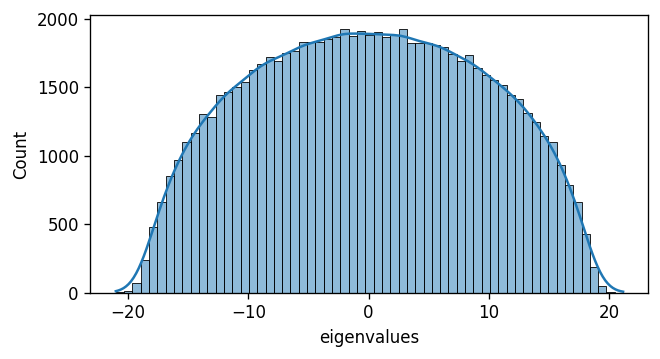

In [14]:
plt.figure(figsize=(6,3), dpi=120)
sbn.histplot(results, kde=True)

plt.xlabel('eigenvalues')
plt.savefig('hist_8_1000_temp3.png', dpi=300)

plt.show()

In [19]:
# vysledky jakz takz pro:
# - N = 80
# - num_of_experiments = 10000 a vice
# - diagonala z N(0,1), nediagonala z N(0,2)

## paralelize

In [16]:
import multiprocessing

In [17]:
num_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

Number of CPU cores available: 16


In [ ]:
if __name__ == "__main__":
    # Number of parallel processes
    num_processes = 4  # You can adjust this to your hardware capabilities
    num_of_experiments = 10
    num_of_dims_of_mtx = 8

    # Create a multiprocessing pool
    pool = multiprocessing.Pool(processes=num_processes)

    # Define the arguments for each run of function 'experiment()'
    a_values = [None] * num_of_experiments  # names of experiments
    b_values = [num_of_dims_of_mtx] * num_of_experiments  # dimensions of matrices
    c_values = [False] * num_of_experiments  # printing suppresed
    d_values = [13] * num_of_experiments  # Example values for 'c'\
    d_values = list(range(1, num_of_experiments+1)) # random seeds (otherwise each thread gives deterministic results)

    # Create a list of argument tuples for foo
    # args for 'experiment' func >>> (name:str = 'none', num_of_dims_of_mtx: int = 3, print_result: bool = False)
    arguments = [(name, num_of_dims_of_mtx, print_result, seed) for name, num_of_dims_of_mtx, print_result, seed in zip(a_values, b_values, c_values, d_values)]

    # Use Pool.starmap to run foo in parallel
    results = pool.starmap(experiment, arguments)

    # Close the pool (no more tasks can be added)
    pool.close()

    # Wait for all processes to complete
    pool.join()

    # 'results' will contain the results of running foo for each set of arguments
    #print(results)


In [ ]:
len(results)

In [ ]:
# concatenate values from all pools into one list
results_par = [item for sublist in results for item in sublist]

In [ ]:
plt.figure(figsize=(6,3), dpi=120)
sbn.histplot(results_par, kde=True)

plt.xlabel('eigenvalues')
plt.savefig('test_img.png', dpi=300)

plt.show()

In [ ]:
# is it normal distribution?
from scipy.stats import shapiro
import random

# Generate some example data (replace this with your actual data)
data = [random.normalvariate(0, 1) for _ in range(100)]
data = results_par

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(data)

# Set a significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value > alpha:
    print("Data looks like it comes from a normal distribution (fail to reject H0)")
else:
    print("Data does not look like it comes from a normal distribution (reject H0)")


## END

## saving and loading python objects

### save>>

In [ ]:
import pickle

# Your list data
my_list = [1, 2, 3, 4, 5]

# Specify the file name where you want to save the list
file_name = "my_list.pkl"

# Open the file in binary write mode and save the list using pickle
with open(file_name, "wb") as file:
    pickle.dump(my_list, file)

del(my_list)

### load>>

In [ ]:
import pickle

# Specify the file name from which to load the list
file_name = "my_list.pkl"

# Open the file in binary read mode and load the list using pickle
with open(file_name, "rb") as file:
    loaded_list = pickle.load(file)

# Now, loaded_list contains the data from the saved list
print(loaded_list)


## paralel computing

In [30]:
import multiprocessing

# Define your function
def foo(a, b, c):
    # Your function logic here
    result = a + b + c
    return result

if __name__ == "__main__":
    # Number of parallel processes
    num_processes = 4  # You can adjust this to your hardware capabilities

    # Create a multiprocessing pool
    pool = multiprocessing.Pool(processes=num_processes)

    # Define the arguments for foo function
    a_values = [1, 2, 3, 4, 5]  # Example values for 'a'
    b_values = [10, 20, 30, 40, 50]  # Example values for 'b'
    c_values = [100, 200, 300, 400, 500]  # Example values for 'c'

    # Create a list of argument tuples for foo
    arguments = [(a, b, c) for a, b, c in zip(a_values, b_values, c_values)]

    # Use Pool.starmap to run foo in parallel
    results = pool.starmap(foo, arguments)

    # Close the pool (no more tasks can be added)
    pool.close()

    # Wait for all processes to complete
    pool.join()

    # 'results' will contain the results of running foo for each set of arguments
    print(results)


[111, 222, 333, 444, 555]
